In [77]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt



In [78]:
import numpy as np
import pandas as pd

In [79]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [80]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import Integer, Table, Column, MetaData

In [81]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [82]:
# We can view all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [83]:
# reflect an existing database into a new model
inspector = inspect(engine)

# reflect the tables
inspector.get_table_names()

['measurement', 'station']

In [84]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [85]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [86]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [87]:
# Save references to each table

measurement = Base.classes.measurement
station =Base.classes.station
print(station)

<class 'sqlalchemy.ext.automap.station'>


In [88]:
# Create our session (link) from Python to the DB

# Create a session
session = Session(engine)
# Use the session to query measurement table and display the first 5 precipitation
for row in session.query(measurement, measurement.prcp).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x00000181FB862500>, 0.08)
(<sqlalchemy.ext.automap.measurement object at 0x00000181FB8625F0>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x00000181FB862650>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x00000181FB8626B0>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x00000181FB862710>, None)


In [89]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_year).all()

# Unpack the pricipitation and dates from the results and save into separate lists

dates = [result[0] for result in results[:-1]]
prcp = [(result[1]) for result in results[:-1]]


In [90]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index(df["date"] , inplace=True, )
df.sort_index()



,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


In [91]:
df.sort_index()
df.head(20)

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
2016-08-28,2016-08-28,0.01
2016-08-29,2016-08-29,0.00
2016-08-30,2016-08-30,0.00
2016-08-31,2016-08-31,0.13


# Exploratory Climate Analysis

Text(0, 0.5, 'Inches')

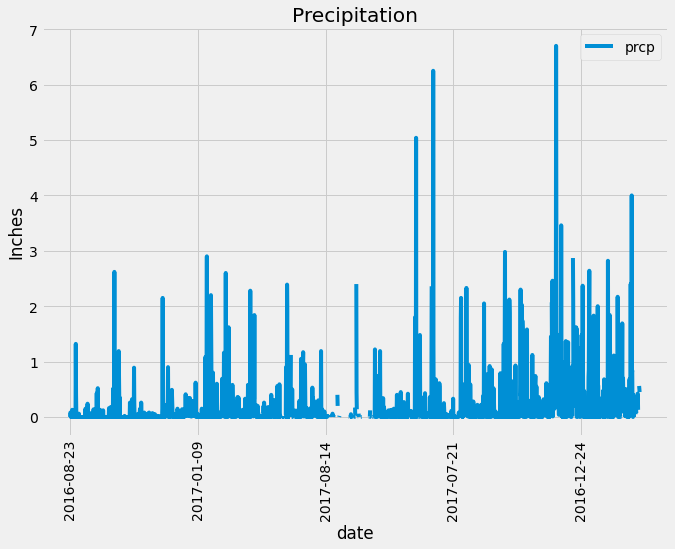

In [92]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(rot=90,figsize=(10, 7))

plt.title("Precipitation")
plt.xlabel("date")
plt.ylabel("Inches")


In [93]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [94]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(station).count()
stations

uni = session.query(station.name, station.id).count()
uni

9

In [95]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries.
activ_station = session.query(station.name, func.max(station.name))
activ_station

session.query(station.name, func.count(station.name)).\
    group_by(station.name).order_by(func.count(station.name).desc()).all()

[('WAIMANALO EXPERIMENTAL FARM, HI US', 1),
 ('WAIKIKI 717.2, HI US', 1),
 ('WAIHEE 837.5, HI US', 1),
 ('UPPER WAHIAWA 874.3, HI US', 1),
 ('PEARL CITY, HI US', 1),
 ('MANOA LYON ARBO 785.2, HI US', 1),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 1),
 ('KANEOHE 838.1, HI US', 1),
 ('HONOLULU OBSERVATORY 702.2, HI US', 1)]

In [96]:
session.query(station.name).all()

[('WAIKIKI 717.2, HI US',),
 ('KANEOHE 838.1, HI US',),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US',),
 ('PEARL CITY, HI US',),
 ('UPPER WAHIAWA 874.3, HI US',),
 ('WAIMANALO EXPERIMENTAL FARM, HI US',),
 ('WAIHEE 837.5, HI US',),
 ('HONOLULU OBSERVATORY 702.2, HI US',),
 ('MANOA LYON ARBO 785.2, HI US',)]

In [97]:
# List the stations and the counts in descending order.

# #List of stations
session.query(measurement.station, func.count(measurement.prcp)).group_by(measurement.station).all()
#Need counts in descending order

station_count = session.query(measurement.station, func.count(measurement.station)). group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [98]:
start = dt.date(2014, 6, 12)
end = dt.date(2015, 1, 13) 
session.query(measurement.date, measurement.prcp).filter(measurement.date >= start).filter(measurement.date < end).all()


[('2014-06-12', 0.0),
 ('2014-06-13', 0.0),
 ('2014-06-14', 0.0),
 ('2014-06-15', 0.01),
 ('2014-06-16', 0.0),
 ('2014-06-17', 0.03),
 ('2014-06-18', 0.15),
 ('2014-06-19', 0.01),
 ('2014-06-20', 0.07),
 ('2014-06-21', 0.01),
 ('2014-06-22', 0.01),
 ('2014-06-23', 0.19),
 ('2014-06-24', 0.0),
 ('2014-06-25', 0.05),
 ('2014-06-26', 0.06),
 ('2014-06-27', 0.04),
 ('2014-06-28', 0.0),
 ('2014-06-29', 0.01),
 ('2014-06-30', 0.02),
 ('2014-07-01', 0.0),
 ('2014-07-02', 0.01),
 ('2014-07-03', 0.06),
 ('2014-07-04', 0.01),
 ('2014-07-05', 0.02),
 ('2014-07-06', 0.05),
 ('2014-07-07', 0.0),
 ('2014-07-08', 0.0),
 ('2014-07-09', 0.01),
 ('2014-07-10', 0.0),
 ('2014-07-11', 0.0),
 ('2014-07-12', 0.0),
 ('2014-07-13', 0.0),
 ('2014-07-14', 0.0),
 ('2014-07-15', 0.0),
 ('2014-07-16', 0.03),
 ('2014-07-17', 0.05),
 ('2014-07-18', 0.05),
 ('2014-07-19', 0.0),
 ('2014-07-20', 1.09),
 ('2014-07-21', 0.0),
 ('2014-07-22', 0.0),
 ('2014-07-23', 0.01),
 ('2014-07-24', 0.0),
 ('2014-07-25', 0.0),
 ('2014-

In [99]:
# id INTEGER
# station TEXT
# name TEXT
# latitude FLOAT
# longitude FLOAT
# elevation FLOAT

session.query(station.name, station.station).\
    group_by(station.name).order_by(station.station).all()

[('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918'),
 ('KANEOHE 838.1, HI US', 'USC00513117'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830'),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128'),
 ('PEARL CITY, HI US', 'USC00517948'),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838'),
 ('WAIHEE 837.5, HI US', 'USC00519281'),
 ('WAIKIKI 717.2, HI US', 'USC00519397'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523')]

In [100]:
# Which station has the highest number of observations? 'USC00519281'

print(f"The station with the highest number of observations is {station_count[0][0]}")

The station with the highest number of observations is USC00519281


In [101]:
st_name = session.query(station.name).group_by(station.name).filter(station.station =="USC00519281").all()
print(f"The station name with highest number of observations is {st_name[0][0]}")

The station name with highest number of observations is WAIHEE 837.5, HI US


In [102]:
#ID for the station
for row in session.query(station.name, station.id).filter(station.station =="USC00519281").all():
    print(row)

('WAIHEE 837.5, HI US', 7)


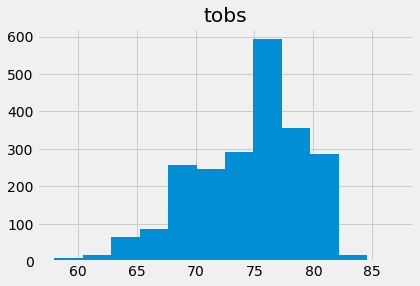

In [107]:
# Filter by the station with the highest number of observations.
# Plot the results as a histogram with bins=12.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Choose the station with the highest number of temperature observations.
station_high = "USC00519281"
# Filter by the station with the highest number of observations.
tobs = session.query(measurement.date, measurement.tobs).filter(station.station =="USC00519281").filter(measurement.date >= prev_year).all()
df = pd.DataFrame(tobs)
hist = df.hist(bins=12)


In [104]:
# Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature of the most active station?
stats = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs))\
    .filter(measurement.date >= prev_year).all()
print(f"The statistics for the minimum temperature, average and maximum temperature over the previous year are {stats[0]}")

The statistics for the minimum temperature, average and maximum temperature over the previous year are (58.0, 74.59058295964125, 87.0)


In [105]:
# Used for queries later in flask 
results = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs))\
    .filter(measurement.date >= start).filter(measurement.date <= end).all()
results

[(56.0, 74.4705497382199, 85.0)]

## Bonus Challenge Assignment

In [106]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
